In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./crypto-markets.csv')

In [3]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [4]:
data.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


In [5]:
data.shape

(942297, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
slug           942297 non-null object
symbol         942297 non-null object
name           942297 non-null object
date           942297 non-null object
ranknow        942297 non-null int64
open           942297 non-null float64
high           942297 non-null float64
low            942297 non-null float64
close          942297 non-null float64
volume         942297 non-null float64
market         942297 non-null float64
close_ratio    942297 non-null float64
spread         942297 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


In [8]:
data['market']

0         1.488567e+09
1         1.603769e+09
2         1.542813e+09
3         1.298955e+09
4         1.168517e+09
              ...     
942292    1.622000e+03
942293    1.823000e+03
942294    1.913000e+03
942295    1.788000e+03
942296    1.654000e+03
Name: market, Length: 942297, dtype: float64

In [10]:
data['date'] = pd.to_datetime(data['date'])
data['market_billion'] = data['market']/1000000000
data['volume_million'] = data['volume'] / 1000000000
data['volume_billion'] = data['volume']

In [33]:
wide_format1 = data.groupby(['date', 'name'])['close']
wide_format1.head()

0           134.21
1           144.54
2           139.00
3           116.99
4           105.21
            ...   
942292    20724.80
942293    23298.70
942294    24442.70
942295    22839.44
942296    21136.72
Name: close, Length: 942297, dtype: float64

In [69]:
wide_format2 = data.groupby(['date', 'name'])[['close']].last()
wide_format2.head(20)

close
date       name                 
2013-04-28 Bitcoin    134.210000
           Litecoin     4.350000
           Namecoin     1.110000
           Novacoin     4.250000
           Peercoin     0.386525
           Terracoin    0.646892
2013-04-29 Bitcoin    144.540000
           Litecoin     4.380000
           Namecoin     1.330000
           Novacoin     4.670000
           Peercoin     0.408861
           Terracoin    0.709691
2013-04-30 Bitcoin    139.000000
           Litecoin     4.300000
           Namecoin     1.500000
           Novacoin     4.310000
           Peercoin     0.375300
           Terracoin    0.674150
2013-05-01 Bitcoin    116.990000
           Litecoin     3.800000

In [70]:
wide_format = data.groupby(['date', 'name'])['close'].last().unstack()
wide_format.head(20)

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
wide_format1.last()

date        name      
2013-04-28  Bitcoin         134.210000
            Litecoin          4.350000
            Namecoin          1.110000
            Novacoin          4.250000
            Peercoin          0.386525
                              ...     
2018-11-29  vSportCoin        0.001450
            wys Token         0.005465
2018-11-30  42-coin       22665.930000
            Bit20         59274.960000
            Project-X     21136.720000
Name: close, Length: 942297, dtype: float64

In [42]:
wide_format = wide_format.stack()
wide_format.head()

date        name    
2013-04-28  Bitcoin     134.210000
            Litecoin      4.350000
            Namecoin      1.110000
            Novacoin      4.250000
            Peercoin      0.386525
dtype: float64

In [46]:

wide_format = wide_format.unstack(level=0)
wide_format.head()

date        name     
2013-04-28  0chain      NaN
            0x          NaN
            0xBitcoin   NaN
            0xcert      NaN
            1World      NaN
dtype: float64

In [47]:

wide_format = wide_format.unstack(level=-1)
wide_format.head()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:

wide_format = wide_format.unstack(level=-2)
wide_format.head()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


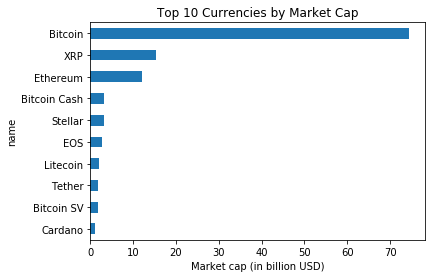

In [56]:
ax = data.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

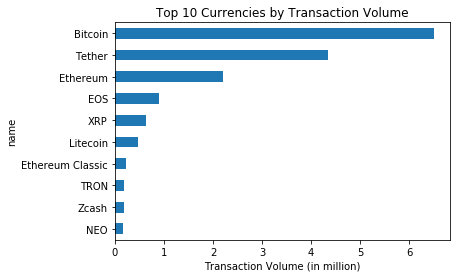

In [57]:
ax = data.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [60]:
ax = data.groupby(['name'])['volume_million'].last()
ax

name
0chain           1.690730e-04
0x               1.781977e-02
0xBitcoin        2.278100e-04
0xcert           1.261950e-04
1World           5.496000e-05
                     ...     
smARTOFGIVING    6.520000e-07
ugChain          1.366360e-04
vSlice           0.000000e+00
vSportCoin       3.502200e-05
wys Token        0.000000e+00
Name: volume_million, Length: 2071, dtype: float64

In [76]:
wide_format5 = data.groupby(['date', 'name'])
wide_format5.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,1.488567,0.000000e+00,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,1.603769,0.000000e+00,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,1.542813,0.000000e+00,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,1.298955,0.000000e+00,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,1.168517,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80,0.000002,1.430000e-07,143.0
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20,0.000002,6.370000e-07,637.0
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00,0.000002,4.900000e-08,49.0
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52,0.000002,1.530000e-07,153.0


In [77]:
wide_format5 = data.groupby(['date', 'name'])['close']
wide_format5.head()

0           134.21
1           144.54
2           139.00
3           116.99
4           105.21
            ...   
942292    20724.80
942293    23298.70
942294    24442.70
942295    22839.44
942296    21136.72
Name: close, Length: 942297, dtype: float64

In [79]:
wide_format5 = data.groupby(['date', 'name'])['close'].last()
wide_format5.head(50)

date        name       
2013-04-28  Bitcoin        134.210000
            Litecoin         4.350000
            Namecoin         1.110000
            Novacoin         4.250000
            Peercoin         0.386525
            Terracoin        0.646892
2013-04-29  Bitcoin        144.540000
            Litecoin         4.380000
            Namecoin         1.330000
            Novacoin         4.670000
            Peercoin         0.408861
            Terracoin        0.709691
2013-04-30  Bitcoin        139.000000
            Litecoin         4.300000
            Namecoin         1.500000
            Novacoin         4.310000
            Peercoin         0.375300
            Terracoin        0.674150
2013-05-01  Bitcoin        116.990000
            Litecoin         3.800000
            Namecoin         1.210000
            Novacoin         3.680000
            Peercoin         0.322892
            Terracoin        0.568572
2013-05-02  Bitcoin        105.210000
            Litecoin      

In [82]:
pivot_data = data.pivot(index='date', columns='name', values='close')
pivot_data.head()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
